# DTSC-670 Final Project
## Part 1: Technical Implementation

### Name: Kurt Brown

## Academic Integrity

**Key Principle: All work must be your own**

Plagiarism checks will be conducted at the end of the term for both code and written documents.

While you may look online for inspiration, all work in your project must be your own. Do not copy ideas from online sources or collaborate with classmates. Do not use Large Language Models (LLMs) to write your code. Relying on LLMs undermines your learning experience and violates academic ethics. This course is designed to develop your skills.

Do not share or post your work online. Use private repositories if needed. 

Violations will result in a zero grade for the assignment, possible failure of the course, and potential dismissal from the program.

## Overview

### Machine Learning Task
Suppose you work in the Advising Team for a large Portuguese school system, and your school director has asked you to analyze student data and create a machine learning model to predict a student’s performance based on select features. Your director hopes to use this information to identify students who might need additional assistance and interventions to improve their grades.

Your task is to create a regression model to predict a student's grade. You will need to clean and prepare the data to ensure it is suitable for analysis. After building the model, you will evaluate its performance using appropriate metrics to assess its accuracy and effectiveness.

### Note
Follow the instructions carefully and submit your notebook to CodeGrade for testing. Ensure you name the variables as indicated, as CodeGrade requires specific naming for proper evaluation.

## Get the Data

Begin by importing and inspecting your dataset to ensure it is correctly loaded and understand its structure. This initial step sets the foundation for your analysis and modeling.

1) **Import the Data**: Correctly import your data.
2) **Initial Data Check**: Check the initial data, including size and data types.
3) **Identify the Target**: Identify the target attribute.
4) **Split the Data**: Split your data into training and test sets using the variable names `X_train`, `X_test`, `y_train`, and `y_test`.  Use `test_size=0.2` and `random_state=42`.
5) **Comment Your Code**: Get into the habit of including comments in your code. Comments should explain <u>why</u> decisions were made, while the code should be clean enough to read and understand <u>what</u> the program does. 

<span style="color:red">Do not make changes to these training and test set DataFrames going forward. If you need to make changes, save them with a different name. CodeGrade will check them in their original form.</span>

*You may add additional markdown and code blocks to this template as needed.*

In [1]:
### ENTER CODE HERE ###
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Reading in the data
student_demo = pd.read_csv('student-mat.csv')

# Checking the first 5 rows, alos making sure I imported correctly
student_demo.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,0.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,0.0,1.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,2.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,1.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


In [6]:
# Information about the data
# We have some missing data in absences_G1, absences_G2, absences_G3
student_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

## Explore the Data
Understanding your data is a crucial step before building any machine learning model. This exploration phase helps you identify patterns, detect anomalies, and uncover insights that will guide your modeling decisions. By thoroughly analyzing and visualizing the data, you can make informed choices on feature selection and preprocessing, ultimately improving your model's performance and reliability.

This section won't be automatically graded, but you must include your analytical insight and screenshots of your plots in the Executive Summary report.

In this section you should:
1) **Study Attributes**: Thoroughly study the training set attributes and their characteristics.
2) **Visualizations**: Use visualizations to effectively analyze and explore your data. Be ready to explain what the visualization shows and why it is important.  
3) **Correlations**: Analyze correlations between your numeric attributes.

*CodeGrade will only have matplotlib and seaborn libraries loaded. You can use other libraries (e.g., Plotly) or use software (e.g., Tableau) for your visualizations, but comment out any code that is not matplotlib or seaborn before submitting to CodeGrade including import statements.*

You will include your analysis and at least three plots in your Executive Summary. Use either screenshots and paste them into your Executive Summary document or the `savefig()` method. Here's example code for saving a plot in different file formats:
```
import matplotlib.pyplot as plt

# Your plotting code here
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Sample Plot')

# Save the plot as a PNG file
plt.savefig('my_plot.png')

# Optionally, save in other formats
plt.savefig('my_plot.pdf')
plt.savefig('my_plot.jpg')
```

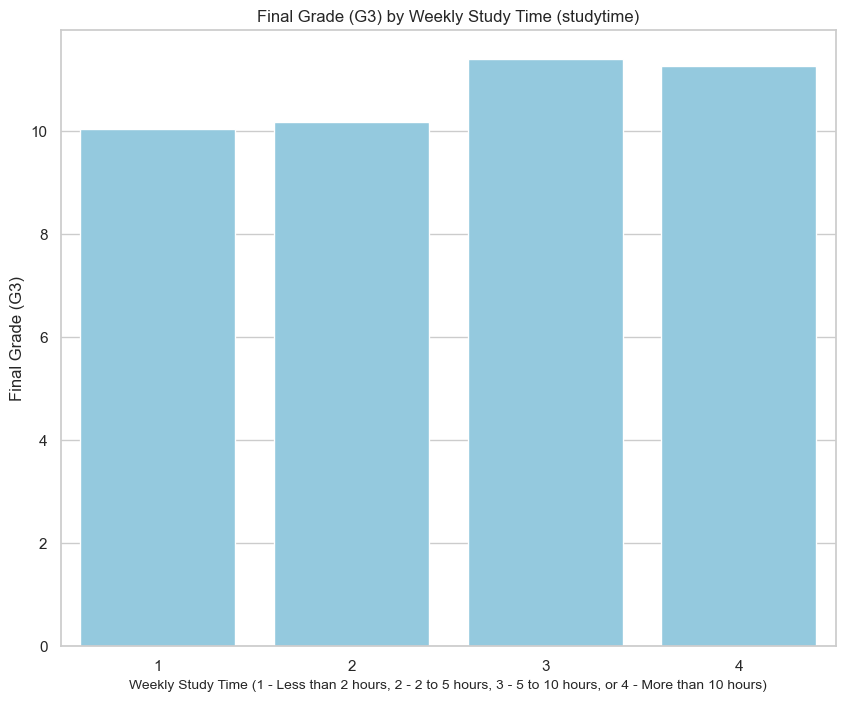

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.barplot(x="studytime", y="G3", data=student_demo, errorbar=None, color="skyblue")
plt.title("Final Grade (G3) by Weekly Study Time (studytime)", fontsize=12)
plt.xlabel("Weekly Study Time (1 - Less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - More than 10 hours)", fontsize=10)
plt.ylabel("Final Grade (G3)", fontsize=12)
plt.show()

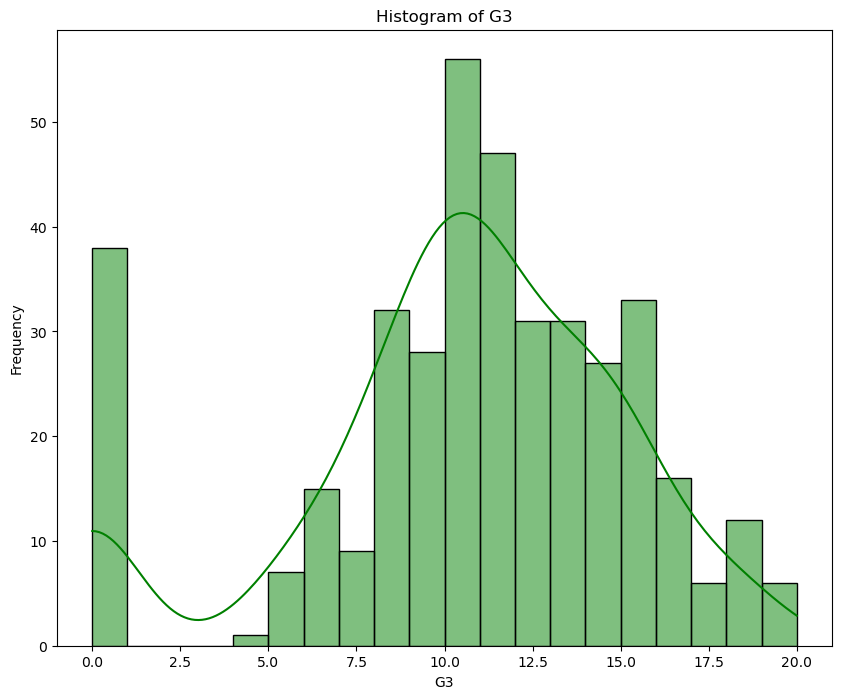

In [8]:
### ENTER CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.histplot(student_demo["G3"], kde=True, bins=20, color="green")
plt.title('Histogram of G3')
plt.xlabel('G3')
plt.ylabel("Frequency")
plt.show()

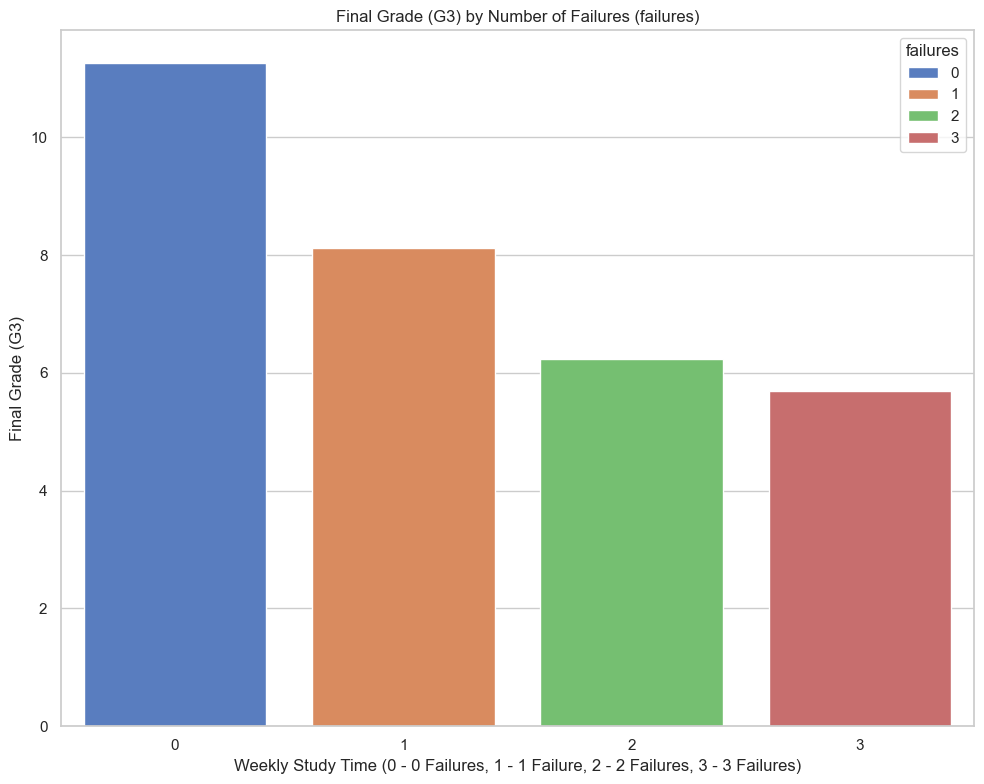

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10,8))
sns.barplot(x="failures", y="G3", hue="failures", data=student_demo, palette='muted', errorbar=None)

plt.title("Final Grade (G3) by Number of Failures (failures)", fontsize=12)
plt.xlabel("Weekly Study Time (0 - 0 Failures, 1 - 1 Failure, 2 - 2 Failures, 3 - 3 Failures)", fontsize=12)
plt.ylabel("Final Grade (G3)", fontsize=12)
plt.tight_layout()
plt.show()


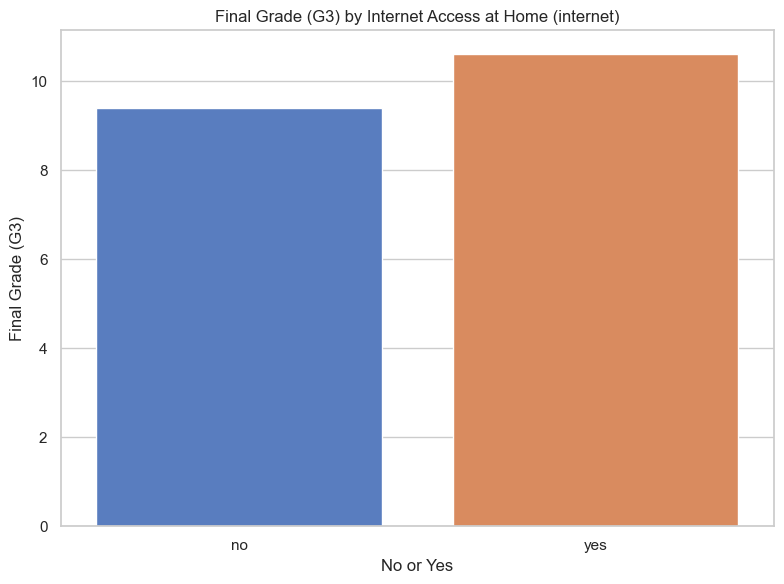

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.barplot(x="internet", y="G3", hue="internet", data=student_demo, palette='muted', errorbar=None)

plt.title("Final Grade (G3) by Internet Access at Home (internet)", fontsize=12)
plt.xlabel("No or Yes", fontsize=12)
plt.ylabel("Final Grade (G3)", fontsize=12)
#plt.show()

plt.tight_layout()
plt.show()


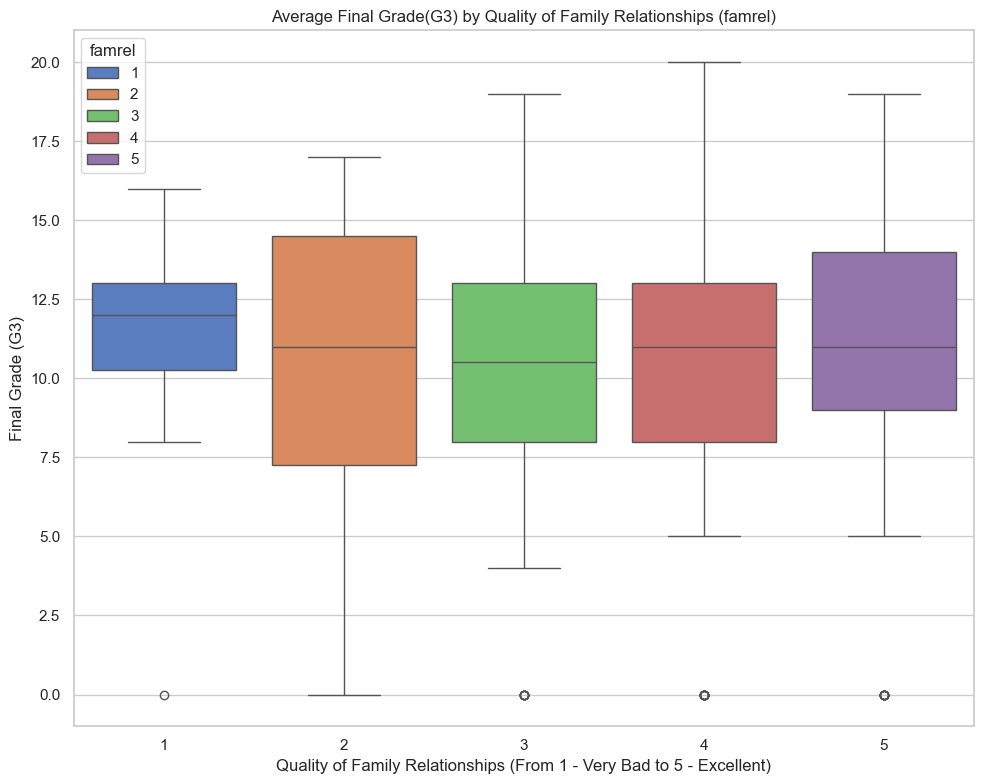

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(x="famrel", y="G3", hue="famrel", data=student_demo, palette='muted')

plt.title("Average Final Grade(G3) by Quality of Family Relationships (famrel)", fontsize=12)
plt.xlabel("Quality of Family Relationships (From 1 - Very Bad to 5 - Excellent)", fontsize=12)
plt.ylabel("Final Grade (G3)", fontsize=12)

plt.tight_layout()
plt.show()


In [12]:
### ENTER CODE HERE ###
from sklearn.model_selection import train_test_split

# X_test (target)
student_target = student_demo['G3']

# X_train (Every column but the target)
student_features = student_demo.drop('G3', axis=1)

X_train, X_test, y_train, y_test = train_test_split(student_features, student_target, test_size=0.2, random_state=42)

In [13]:
# check descriptive statistics for numerical data
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,306.000000,309.000000,307.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.709150,1.110032,4.312704,10.933544,10.651899
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373179,1.490510,5.064931,3.216823,3.755930
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,4.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,2.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,11.000000,36.000000,19.000000,19.000000


## Prepare the Data

### Feature Selection

Based on your data exploration, begin considering the features you want to include in your model. Limiting your data can be beneficial because it reduces complexity and can improve model performance by focusing on the most relevant features.

Create lists below for the columns you want to use in your model based on your exploration above. These features will be used in the column transformer. The list names must match exactly.

- **numeric_columns**: This is your continuous numerical data that MUST include `absences_G1`, `absences_G2`, `absences_G3`, `G1`, and `G2` for use in your custom transformer, in addition to any other numerical columns you want to select. Note: The fact that a column is labeled as an integer or float does not necessarily indicate that it contains continuous data.
- **categorical_columns**: Include at least one categorical column.
- **ordinal_columns**: Include at least one ordinal column.

In [14]:
numeric_columns = ["absences_G1", "absences_G2", "absences_G3", "G1", "G2"]
categorical_columns = ["higher", "schoolsup"]
ordinal_columns = ["traveltime", "studytime"]

### Custom Transformer
We want to create a new column that sums the three absences columns together as a new feature. Additionally, we want to  conditionally keep or drop the grades for the first and second terms based on the parameters passed.

G3 is the final year grade and is highly correlated with G2 and G1, which are grades from the first two terms. Predicting G3 without using G2 and G1 is more challenging but also more valuable since you could make predictions earlier in the year. Therefore, later we will create separate models (one that includes the G1 and G2 columns and one that excludes them) to test this.

#### Instructions for Submission

Create a custom transformer that:

- Inherits from BaseEstimator and TransformerMixin.
- Implements the fit and transform methods.
- Accepts a DataFrame as input. This differs from the California Housing Prices example, which used arrays. We will pass a DataFrame into the custom transformer to allow for easier testing with CodeGrade.
- In the transform method:
    - Create a new column called `absences_sum` that sums the `absences_G1`, `absences_G2`, and `absences_G3` columns, adds the new `absences_sum` column to the end of the DataFrame, then drops the original three absence columns.
    - Drop the `G1` and `G2` columns if the parameter `drop_grades` is `True`. It will keep the columns if `drop_grades` is `False`.
- Name the custom transformer class `FinalProjectTransformer`.

In [15]:
### ENTER CODE HERE ###
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class FinalProjectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades=False):
        self.drop_grades = drop_grades

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["absences_sum"] = X["absences_G1"] + X["absences_G2"] + X["absences_G3"]

        X = X.drop(["absences_G1", "absences_G2", "absences_G3"], axis=1)

        if self.drop_grades:
            X = X.drop(["G1","G2"], axis=1)

        return X


### Data Pipelines Instructions
Creating data pipelines allows you to automate your data cleaning process, making it easy to apply the same transformations to new data. Follow the outline below to transform your dataset into two sets of transformed data: one with the G1/G2 columns and one without them.

#### Instructions for Submission
- Numeric Pipeline (you'll need to create two to handle the G1/G2 requirement)
  - Impute missing values using SimpleImputer() (use [.set_output(transform="pandas")](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html) to output a DataFrame from your SimpleImputer into your custom transformer) 
  - Transform data using the custom transformer FinalProjectTransformer as appropriate for the task
  - Standardize the data using StandardScalar()
  - Use the following variable names:
    - `numeric_pipeline_with_grades`
    - `numeric_pipeline_without_grades`

- Categorical Pipeline
  - Impute missing values 
  - One-Hot Encode (OHE) categorical data 
  - Use the following variable name:
    - `categorical_pipeline`

- Ordinal Pipeline
  - Impute missing values 
  - Ordinal encode the data
  - Use the following variable name:
    - `ordinal_pipeline`

- Column Transformer (you'll need to create two to handle the two different numeric pipelines)
  - pass in your previously created feature selection lists
  - Combine the numeric, categorical, and ordinal pipelines
  - Use the following variable names:
    - `column_transformer_with_grades`
    - `column_transformer_without_grades`
    
Once the full pipeline is set up, fit and transform `X_train`, saving the results as `X_train_transformed_with_grades` and `X_train_transformed_without_grades`. Confirm that the transformed data without grades has two fewer columns.

In [16]:
### ENTER CODE HERE ###
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer

# Numeric Pipeline
numeric_pipeline_with_grades = Pipeline([
    ("imputer", SimpleImputer(strategy="median").set_output(transform="pandas")),
    ("custom_transformer", FinalProjectTransformer(drop_grades=False)), 
    ("scaler", StandardScaler())
])

numeric_pipeline_without_grades = Pipeline([
    ("imputer", SimpleImputer(strategy="median").set_output(transform="pandas")),
    ("custom_transformer", FinalProjectTransformer(drop_grades=True)), 
    ("scaler", StandardScaler())
])


In [17]:
from sklearn.preprocessing import OneHotEncoder
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent").set_output(transform="pandas")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")) 
])

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent").set_output(transform="pandas")),
    ("ordinal", OrdinalEncoder()) 
])

In [19]:
from sklearn.compose import ColumnTransformer

column_transformer_with_grades = ColumnTransformer(transformers=[
    ("numeric", numeric_pipeline_with_grades, numeric_columns),
    ("categorical", categorical_pipeline, categorical_columns),
    ("ordinal", ordinal_pipeline, ordinal_columns)
])

column_transformer_without_grades = ColumnTransformer([
    ("numeric", numeric_pipeline_without_grades, numeric_columns),
    ("categorical", categorical_pipeline, categorical_columns),
    ("ordinal", ordinal_pipeline, ordinal_columns)
])

X_train_transformed_with_grades = column_transformer_with_grades.fit_transform(X_train)

X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test)

X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train)

X_test_transformed_without_grades = column_transformer_without_grades.fit_transform(X_test)

## Shortlist Promising Models
In this section, you will fit and compare three regression models to your transformed data, both with and without the G1/G2 columns, using cross-validation. Follow the steps below, using the specified variable names.

1) **Initialize Three Regression Models**
- Linear Regression
- Support Vector Machine (SVM) Regression
- Lasso Regression

2) **Compare Models with Cross-Validation**
- Using the above models, perform cross-validation on each model using both sets of transformed data (with and without G1/G2 columns).

### Instructions for Submission
1) **Initialize the Models**: Instantiate a Linear Regression, SVM Regression, and Lasso Regression model.
  - Use the specified variable names for the respective models:
    - `lin_reg`
    - `svm_reg`
    - `lasso_reg`
2) **Cross-Validation**: Using both sets of transformed data (with and without G1/G2 columns), perform 3-fold cross-validation for each model using RMSE as the metric.
  - You will run cross-validation six times (e.g., cross-validation of the linear regression model with the G1/G2 data, cross-validation of the linear regression model without the G1/G2 data, etc.)
  - Use the specified variable names to save each respective array of scores:
    - `cv_scores_lin_reg_with_grades`
    - `cv_scores_lin_reg_without_grades`
    - `cv_scores_svm_with_grades`
    - `cv_scores_svm_without_grades`
    - `cv_scores_lasso_with_grades`
    - `cv_scores_lasso_without_grades`
  - Use the specified variable names to save the mean of each cross-validation array and print it to view your mean scores:
    - `rmse_lin_reg_with_grades`
    - `rmse_lin_reg_without_grades`
    - `rmse_svm_with_grades`
    - `rmse_svm_without_grades`
    - `rmse_lasso_with_grades`
    - `rmse_lasso_without_grades`

*You are welcome to test and fit more regression models as long as the above three are included and named appropriately*

In [20]:
### ENTER CODE HERE ###

In [21]:
### ENTER CODE HERE ###
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

cv_scores_lin_reg_with_grades = cross_val_score(lin_reg, X_train_transformed_with_grades, y_train, cv=3, scoring="neg_mean_squared_error")
cv_scores_lin_reg_without_grades = cross_val_score(lin_reg, X_train_transformed_without_grades, y_train, cv=3, scoring="neg_mean_squared_error")

In [22]:
svm_reg = SVR()

cv_scores_svm_with_grades = cross_val_score(svm_reg, X_train_transformed_with_grades, y_train, cv=3, scoring="neg_mean_squared_error")
cv_scores_svm_without_grades = cross_val_score(svm_reg, X_train_transformed_with_grades, y_train, cv=3, scoring="neg_mean_squared_error")

In [23]:
lasso_reg = Lasso()

cv_scores_lasso_with_grades = cross_val_score(lasso_reg, X_train_transformed_with_grades, y_train, cv=3, scoring="neg_mean_squared_error")
cv_scores_lasso_without_grades = cross_val_score(lasso_reg, X_train_transformed_with_grades, y_train, cv=3, scoring="neg_mean_squared_error")

In [24]:
rmse_lin_reg_with_grades = np.sqrt(-cv_scores_lin_reg_with_grades.mean())
rmse_svm_with_grades = np.sqrt(-cv_scores_svm_with_grades.mean())
rmse_lasso_with_grades = np.sqrt(-cv_scores_lasso_with_grades.mean())

In [25]:
rmse_lin_reg_without_grades = np.sqrt(-cv_scores_lin_reg_without_grades.mean())
rmse_svm_without_grades = np.sqrt(-cv_scores_svm_without_grades.mean())
rmse_lasso_without_grades = np.sqrt(-cv_scores_lasso_without_grades.mean())

In [26]:
print(rmse_lin_reg_with_grades)
print(rmse_svm_with_grades)
print(rmse_lasso_with_grades)
print(rmse_lin_reg_without_grades)
print(rmse_svm_without_grades)
print(rmse_lasso_without_grades)

1.9037282433657403
2.302526918192479
2.1697364061713884
4.476713647269255
2.302526918192479
2.1697364061713884


## Fine-Tune the System
In this section, you will use the Support Vector Machine (SVM) regression model and perform grid search to fine-tune its hyperparameters. Follow the steps below to set up the grid search, ensuring you use the specified variable names for automatic grading through CodeGrade.

1) Set Up Grid Search for SVM Regression
  - Define a parameter grid to search over. Review Scikit-learn's documentation for the available hyperparameters for this algorithm.
  - Use GridSearchCV to find the best hyperparameters.
  - Fit the grid search to both sets (with and without the G1/G2 columns) of the transformed training data.

### Instructions for Submission

1) **Define Parameter Grid**: Set up a parameter grid for the SVM regression model name `param_grid`.
2) **Initialize Grid Search**: Initialize the `GridSearchCV` and call this `grid_search`.
3) **Fit the Grid Search**: Fit the grid search to both sets (with and without the G1/G2 columns) of the transformed training data.
4) **Save & Print Best Parameters**: Save the best parameters for each respective fit to `best_params_with_grades` and `best_params_without_grades`, and print them.
5) **Print Best Score**: Use the `best_score_` attribute to view the mean cross-validated score for each respective best_estimator
  
<span style="color:red">Codegrade has a runtime limit of 5 minutes. If your code takes longer than 5 minutes to run, the automatic grading will stop and mark the submission as having an error. Limiting the number of hyperparameters checked during your grid search may greatly reduce your code’s running time.</span>

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "epsilon": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf"]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search_without_grades = GridSearchCV(SVR(), param_grid, cv=3, scoring="neg_mean_squared_error")

grid_search.fit(X_train_transformed_with_grades, y_train)
grid_search_without_grades.fit(X_train_transformed_without_grades, y_train)

best_params_with_grades = grid_search.best_params_
print(best_params_with_grades)

best_params_without_grades = grid_search_without_grades.best_params_
print(best_params_without_grades)

best_score_with_grades = grid_search.best_score_
print(best_score_with_grades)

best_score_without_grades = grid_search_without_grades.best_score_
print(best_score_without_grades)

{'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
{'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'}
-3.651644319118476
-19.35509726353425


## Measure Performance on Test Set
In this section, you will transform the test set using your full pipeline and measure the performance of your best model on the test set. Follow the steps below, using the specified variable names for automatic grading through CodeGrade.

1) Based on all previous cross-validation results, pick your best model.
2) Use the previously created column transformers to transform the test set, both with and without the G1/G2 columns.
3) Using your best model, measure its performance on the test set to estimate the generalization error.
  
### Instructions for Submission
1) **Fit Best Model**: If you haven't already, fit your best model to both sets of your transformed training data. 
2) **Transform the Test Set**: Use your column transformers to transform the test set (`X_test`), both with and without the G1/G2 columns. Name these transformed datasets `X_test_transformed_with_grades` and `X_test_transformed_without_grades`.
3) **Evaluate Performance**: Measure the performance of your best-fitted models on the transformed test sets using Root Mean Squared Error (RMSE) and R-squared (R²) metrics. Save these variables as:
  - `rmse_with_grades`
  - `r2_with_grades`
  - `rmse_without_grades`
  - `r2_without_grades`

In [28]:
### ENTER CODE HERE ###
from sklearn.metrics import mean_squared_error, r2_score

best_model_with_grades = grid_search.best_estimator_
best_model_with_grades.fit(X_train_transformed_with_grades, y_train)

best_model_without_grades = grid_search_without_grades.best_estimator_
best_model_without_grades.fit(X_train_transformed_without_grades, y_train)

X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test)
X_test_transformed_without_grades = column_transformer_without_grades.transform(X_test)

y_pred_with_grades = best_model_with_grades.predict(X_test_transformed_with_grades) 
y_pred_without_grades = best_model_without_grades.predict(X_test_transformed_without_grades) 

rmse_with_grades = np.sqrt(mean_squared_error(y_test, y_pred_with_grades))
r2_with_grades = r2_score(y_test, y_pred_with_grades)

rmse_without_grades = np.sqrt(mean_squared_error(y_test, y_pred_without_grades))
r2_without_grades = r2_score(y_test, y_pred_without_grades)

print(rmse_with_grades)
print(r2_with_grades)
print(rmse_without_grades)
print(r2_without_grades)

2.111880880854821
0.7824905840687295
4.565950774554354
-0.01672072261552149


<span style="color:red">Codegrade has a runtime limit of 5 minutes.  If your code takes longer than 5 minutes to run, the automatic grading will stop and mark the submission as having an error.  Limiting the amount of hyperparameters checked during your grid search may greatly reduce your code’s running time.</span>

## Next Steps
Once you complete all the steps above, you will:

1) Upload your `final_project.ipynb` to the **Final Project Notebook Submission** link in Brightspace to check your work.
2) After passing all unit tests in the automatic grading, finalize your **Executive Summary** document using the student instructions.
3) Submit the **DTSC670_ExecutiveSummary_YourName** document through the **Final Project Executive Summary** submission link.

<span style='color:red'>**BOTH** parts of this project must be completed and submitted to earn a grade.</span>

<span style='color:red'>Submit your Executive Summary only **AFTER** submitting your final autograded notebook to CodeGrade and are satisfied with your score. Your CodeGrade submission score will be used to evaluate your overall project. Note that any CodeGrade submissions made after the Executive Summary has been submitted will not be considered.
</span>